In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, sem

In [70]:
# Load the data from the CSV file
#url = "https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view"
data = pd.read_csv("data.csv")

In [71]:
# Remove leading spaces from column names
data.columns = data.columns.str.strip()


In [72]:
print(data.columns)

Index(['Patient ID', 'Blood Pressure Before (mmHg)',
       'Blood Pressure After (mmHg)'],
      dtype='object')


In [77]:
#a. Measure the dispersion in both and interpret the results.
dispersion_before = np.var(data['Blood Pressure Before (mmHg)'])
dispersion_after = np.var(data['Blood Pressure After (mmHg)'])
print("Dispersion in 'Blood Pressure Before':", dispersion_before)
print("Dispersion in 'Blood Pressure After':", dispersion_after)


Dispersion in 'Blood Pressure Before': 43.10189999999998
Dispersion in 'Blood Pressure After': 46.97040000000002


In [78]:
#b. Calculate mean and 5% confidence interval and plot it in a graph

mean_before = np.mean(data['Blood Pressure Before (mmHg)'])
mean_after = np.mean(data['Blood Pressure After (mmHg)'])
confidence_interval = t.interval(0.95, len(data)-1, loc=mean_before, scale=sem(data['Blood Pressure Before (mmHg)']))

print("Mean 'Blood Pressure Before':", mean_before)
print("Mean 'Blood Pressure After':", mean_after)
print("Confidence Interval:", confidence_interval)

Mean 'Blood Pressure Before': 133.91
Mean 'Blood Pressure After': 128.36
Confidence Interval: (132.60075849172767, 135.21924150827232)


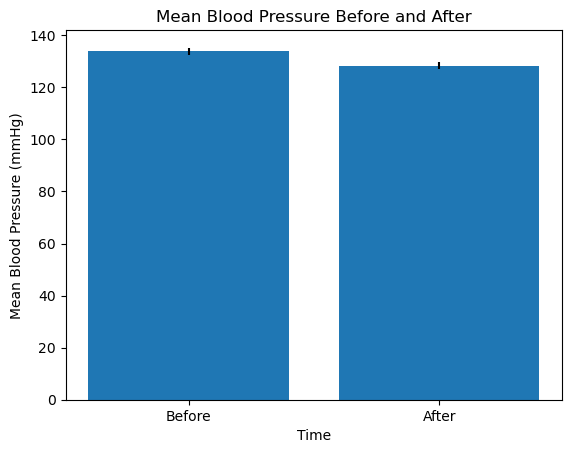

In [76]:
# Plot the means and confidence interval
plt.bar(['Before', 'After'], [mean_before, mean_after], yerr=confidence_interval[1]-mean_before)
plt.xlabel('Time')
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure Before and After')
plt.show()

In [81]:
#c. Calculate Mean Absolute Deviation (MAD) and Standard Deviation (SD)
mad_before = np.mean(np.abs(data['Blood Pressure Before (mmHg)'] - mean_before))
mad_after = np.mean(np.abs(data['Blood Pressure After (mmHg)'] - mean_after))
std_before = np.std(data['Blood Pressure Before (mmHg)'])
std_after = np.std(data['Blood Pressure After (mmHg)'])
print("Mean Absolute Deviation (MAD) in 'Blood Pressure Before':", mad_before)
print("Mean Absolute Deviation (MAD) in 'Blood Pressure After':", mad_after)
print("Standard Deviation (SD) in 'Blood Pressure Before':", std_before)
print("Standard Deviation (SD) in 'Blood Pressure After':", std_after)

Mean Absolute Deviation (MAD) in 'Blood Pressure Before': 5.7118
Mean Absolute Deviation (MAD) in 'Blood Pressure After': 5.9
Standard Deviation (SD) in 'Blood Pressure Before': 6.5652037287505385
Standard Deviation (SD) in 'Blood Pressure After': 6.853495458523338


In [83]:
#d. Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(data['Blood Pressure Before (mmHg)'], data['Blood Pressure After (mmHg)'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.9779485966556016


In [84]:
# Check the significance of correlation coefficient at 1% level of significance
n = len(data)
t_critical = t.ppf(0.995, df=n-2)  # 1% significance level, two-tailed test
standard_error = np.sqrt((1 - correlation_coefficient**2) / (n - 2))
t_statistic = correlation_coefficient / standard_error
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=n-2))
is_significant = p_value < 0.01

print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Is the correlation coefficient significant at 1% level?", is_significant)

T-statistic: 46.35573256849114
P-value: 0.0
Is the correlation coefficient significant at 1% level? True
